In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# data loading by using keras
training_set = tf.keras.utils.image_dataset_from_directory(
    'new_train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 11354 files belonging to 30 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'new_validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4228 files belonging to 30 classes.


In [ ]:
for x,y in training_set: # x-> pix.. value y-> label
    print (x , x.shape)
    print(y , y.shape)
    break
# this line show the pixel value and label of an image

tf.Tensor(
[[[[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [ 37.058643  64.6237    32.487213]
   [ 39.28064   67.        36.      ]
   [ 35.284435  67.        29.28442 ]]

  [[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [ 41.83799   66.55228   34.499973]
   [ 48.761383  75.49986   46.66307 ]
   [ 33.269096  64.198944  26.626213]]

  [[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [ 27.321426  58.214287  21.321402]
   [ 43.280273  73.38106   40.173126]
   [ 31.919588  62.90556   25.89663 ]]

  ...

  [[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[255.       255.       255.    

In [5]:
# building model

from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten , BatchNormalization , Dropout
from tensorflow.keras.models import Sequential

In [6]:
from tensorflow.keras.optimizers.legacy import Adam

In [7]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same' , activation='relu', input_shape=[224,224 , 3])) # rectified linear unit
model.add(Conv2D(filters=32,kernel_size=3,padding='same' , activation='relu')) # Activation functions are an integral building block of neural networks that enable them to learn complex patterns in data.

# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))

d:\MedicalPlant\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same' , activation='relu', input_shape=[224,224 , 3]))
model.add(Conv2D(filters=64,kernel_size=3,padding='same' , activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same' , activation='relu', input_shape=[224,224 , 3]))
model.add(Conv2D(filters=128,kernel_size=3,padding='same' , activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))

In [11]:
# model.add(Conv2D(filters=256,kernel_size=3,padding='same' , activation='relu', input_shape=[224,224 , 3]))
# model.add(Conv2D(filters=256,kernel_size=3,padding='same' , activation='relu'))
# # model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=2 , strides=2))

In [12]:
# flattenig operation
model.add(Flatten())

In [13]:
model.add(Dense(units=1024,activation='relu'))

In [14]:
model.add(Dropout(0.5))

In [15]:
# output layer
model.add(Dense(units=30 , activation='softmax'))

In [16]:
# compiling model 
model.compile(optimizer='Adam' , loss='categorical_crossentropy',metrics=['accuracy'])

Early Stoping

In [17]:
from keras.callbacks import  EarlyStopping
callback =EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=45,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │   102,761,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │        30,750 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,079,230 (393.22 MB)

 Trainable params: 103,079,230 (393.22 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 3050 Laptop GPU
Using device: cuda


In [19]:
# model training
training_model=model.fit(x=training_set,validation_data=validation_set,epochs=150 , callbacks=callback)

Epoch 1/150
355/355 ━━━━━━━━━━━━━━━━━━━━ 910s 3s/step - accuracy: 0.2909 - loss: 10.0116 - val_accuracy: 0.6838 - val_loss: 1.0182
Epoch 2/150
355/355 ━━━━━━━━━━━━━━━━━━━━ 900s 3s/step - accuracy: 0.7520 - loss: 0.7789 - val_accuracy: 0.7436 - val_loss: 0.8676
Epoch 3/150
355/355 ━━━━━━━━━━━━━━━━━━━━ 879s 2s/step - accuracy: 0.8561 - loss: 0.4544 - val_accuracy: 0.8115 - val_loss: 0.6779
Epoch 4/150
355/355 ━━━━━━━━━━━━━━━━━━━━ 1000s 3s/step - accuracy: 0.9048 - loss: 0.2948 - val_accuracy: 0.8221 - val_loss: 0.6738
Epoch 5/150
355/355 ━━━━━━━━━━━━━━━━━━━━ 883s 2s/step - accuracy: 0.9255 - loss: 0.2217 - val_accuracy: 0.8368 - val_loss: 0.7407
Epoch 6/150
355/355 ━━━━━━━━━━━━━━━━━━━━ 886s 2s/step - accuracy: 0.9399 - loss: 0.1840 - val_accuracy: 0.8614 - val_loss: 0.5951
Epoch 7/150
355/355 ━━━━━━━━━━━━━━━━━━━━ 889s 3s/step - accuracy: 0.9542 - loss: 0.1426 - val_accuracy: 0.8094 - val_loss: 0.9562
Epoch 8/150
355/355 ━━━━━━━━━━━━━━━━━━━━ 882s 2s/step - accuracy: 0.9576 - loss: 0.1357 

In [20]:
# model evaluation on training set

training_loss , train_accuracy = model.evaluate(training_set)

355/355 ━━━━━━━━━━━━━━━━━━━━ 211s 590ms/step - accuracy: 0.9985 - loss: 0.0064


In [21]:
print(training_loss , train_accuracy)

0.004530163947492838 0.9990311861038208


In [ ]:
# model evaluation on validation set

validation_loss , validation_accuracy = model.evaluate(validation_set)

133/133 ━━━━━━━━━━━━━━━━━━━━ 76s 568ms/step - accuracy: 0.8491 - loss: 0.9699


In [23]:
print(validation_loss , validation_accuracy )

0.9685221314430237 0.8533585667610168


In [53]:
# saving the model

# model.save("trained_model_2.0.h5")

In [24]:
model.save("trained_model_2.0_version_2.keras")

In [25]:
tf.keras.callbacks.History()

In [26]:
training_model.history

{'accuracy': [0.4742822051048279,
  0.7898538112640381,
  0.8705301880836487,
  0.916417121887207,
  0.9357054829597473,
  0.9441606402397156,
  0.956843376159668,
  0.9650343656539917,
  0.970142662525177,
  0.9675885438919067,
  0.9756032824516296,
  0.9638893604278564,
  0.9713757038116455,
  0.9752510190010071,
  0.9739298820495605,
  0.9736656546592712,
  0.9778051972389221,
  0.9733133912086487,
  0.9837942719459534,
  0.9801831841468811,
  0.9664435386657715,
  0.9849392175674438,
  0.984234631061554,
  0.9881979823112488,
  0.9882860779762268,
  0.97859787940979,
  0.9716399312019348,
  0.985908031463623,
  0.9888145327568054,
  0.9850273132324219,
  0.9846749901771545,
  0.9830015897750854,
  0.9900475740432739,
  0.9812400937080383,
  0.986700713634491,
  0.9862603545188904,
  0.9948916435241699,
  0.9906640648841858,
  0.9858199954032898,
  0.9885503053665161,
  0.9874053001403809,
  0.9886383414268494,
  0.9927778840065002,
  0.986788809299469,
  0.9931301474571228,
  0.989

In [27]:
# record the history in json format

import json
with open("training_hist_2.0_version2.json" , "w") as f:
    json.dump(training_model.history , f)

In [28]:
# viz

epochs = [i for i in range(1,52)]
epochs

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51]

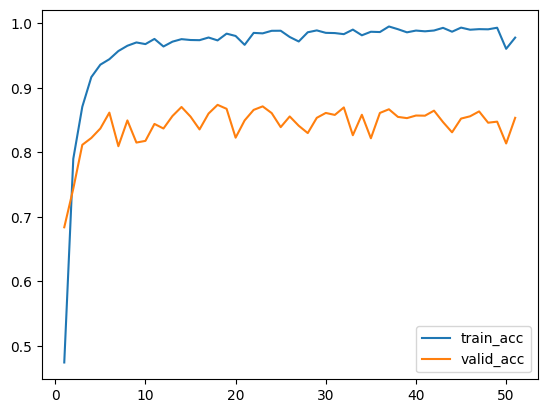

In [29]:
plt.plot(epochs,training_model.history['accuracy'] , label = 'train_acc')
plt.plot(epochs,training_model.history['val_accuracy'] , label='valid_acc')
plt.legend()
plt.show()

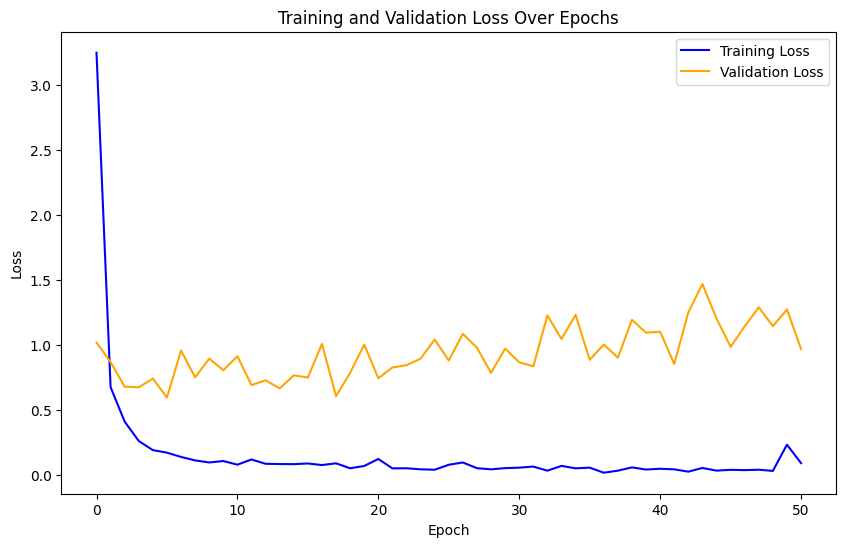

In [30]:
import json
import matplotlib.pyplot as plt

# Load the JSON data from the file
with open(r'D:\MedicalPlant\training_hist_2.0_version2.json') as f:
    data = json.load(f)

# Extract loss and validation loss
loss = data['loss']
val_loss = data['val_loss']

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')

# Add titles and labels
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()


In [31]:
class_name = validation_set.class_names
class_name

['Arive-Dantu',
 'Basale',
 'Betel',
 'Crape_Jasmine',
 'Curry',
 'Drumstick',
 'Fenugreek',
 'Guava',
 'Hibiscus',
 'Indian_Beech',
 'Indian_Mustard',
 'Jackfruit',
 'Jamaica_Cherry-Gasagase',
 'Jamun',
 'Jasmine',
 'Karanda',
 'Lemon',
 'Mango',
 'Mexican_Mint',
 'Mint',
 'Neem',
 'Oleander',
 'Parijata',
 'Peepal',
 'Pomegranate',
 'Rasna',
 'Rose_apple',
 'Roxburgh_fig',
 'Sandalwood',
 'Tulsi']

In [32]:
test_set =tf.keras.utils.image_dataset_from_directory(
    'new_validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=False,# one by one check all the directory
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4228 files belonging to 30 classes.


In [33]:
y_pred = model.predict(test_set)
y_pred

133/133 ━━━━━━━━━━━━━━━━━━━━ 75s 558ms/step


array([[3.8414501e-02, 9.4388783e-02, 2.7405575e-04, ..., 1.9576294e-02,
        1.3121692e-03, 1.9746660e-03],
       [2.1983241e-01, 3.1846708e-01, 4.0046456e-05, ..., 5.5203685e-03,
        1.0288396e-03, 4.0453416e-04],
       [7.3627819e-04, 1.8549163e-04, 3.5341920e-05, ..., 3.5545556e-06,
        2.6455121e-08, 6.3232122e-08],
       ...,
       [2.9951799e-09, 8.7573230e-12, 2.9853044e-11, ..., 3.4105475e-11,
        1.5545222e-09, 8.0509281e-01],
       [5.2919160e-05, 2.7536402e-11, 1.1882943e-12, ..., 1.0832574e-15,
        6.8205011e-11, 1.1643460e-01],
       [4.8220393e-14, 4.6256977e-31, 4.8218187e-37, ..., 9.8814339e-37,
        1.3209900e-30, 1.0000000e+00]], dtype=float32)

In [34]:
y_pred.shape

(4228, 30)

In [35]:
predicted_categories= tf.argmax(y_pred,axis=1)

In [36]:
predicted_categories

<tf.Tensor: shape=(4228,), dtype=int64, numpy=array([ 5, 16,  5, ..., 29,  3, 29], dtype=int64)>

In [37]:
true_categories = tf.concat([y for x,y in test_set] , axis=0)
true_categories #one hot encodding

<tf.Tensor: shape=(4228, 30), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
y_true= tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(4228,), dtype=int64, numpy=array([ 0,  0,  0, ..., 29, 29, 29], dtype=int64)>

In [39]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_true,predicted_categories ,target_names = class_name))

                         precision    recall  f1-score   support

            Arive-Dantu       0.85      0.89      0.87       188
                 Basale       0.93      0.84      0.89       188
                  Betel       0.92      0.99      0.95       168
          Crape_Jasmine       0.83      0.86      0.84       188
                  Curry       0.87      0.88      0.87       188
              Drumstick       0.91      0.95      0.93       188
              Fenugreek       0.98      0.94      0.96       188
                  Guava       0.95      1.00      0.98       188
               Hibiscus       0.76      0.88      0.81       130
           Indian_Beech       0.82      0.88      0.85       128
         Indian_Mustard       0.90      1.00      0.95       128
              Jackfruit       0.80      0.99      0.89       128
Jamaica_Cherry-Gasagase       0.77      0.85      0.81       128
                  Jamun       0.95      0.62      0.75        90
                Jasmine 

In [40]:
cm = confusion_matrix(y_true , predicted_categories)
cm.shape

(30, 30)

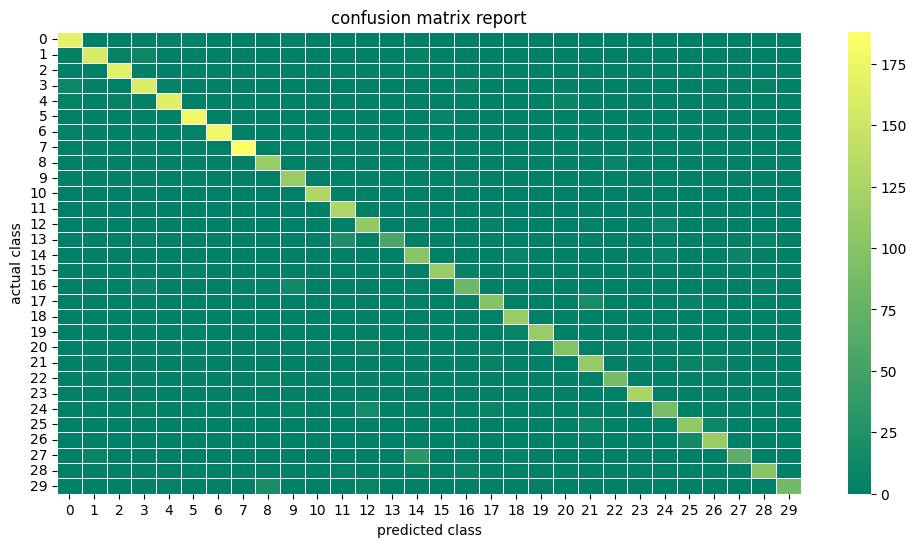

In [44]:
plt.figure(figsize = (12,6))
sns.heatmap(cm,linewidth=0.5, cmap='summer')
plt.title("confusion matrix report")
plt.xlabel('predicted class')
plt.ylabel('actual class')
plt.show()

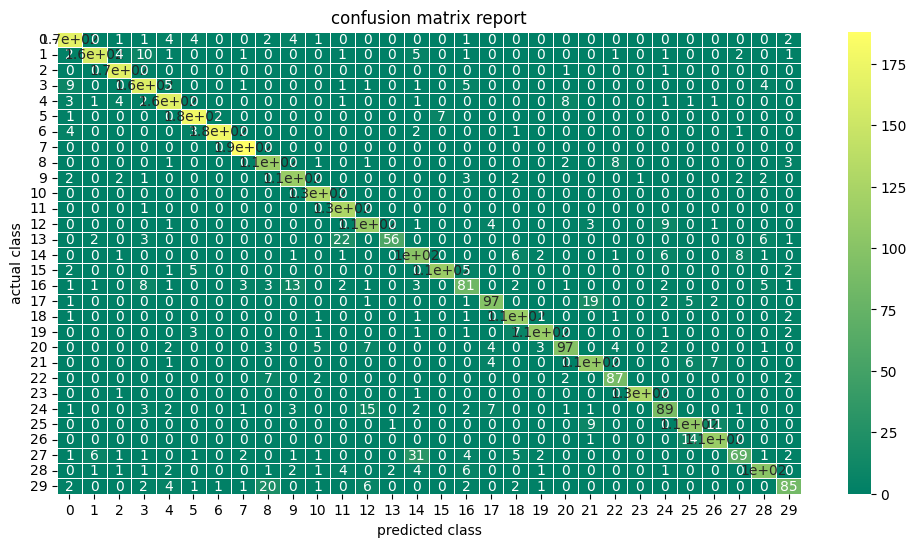

In [45]:
plt.figure(figsize = (12,6))
sns.heatmap(cm ,annot=True,linewidth=0.5, cmap='summer')
plt.title("confusion matrix report")
plt.xlabel('predicted class')
plt.ylabel('actual class')
plt.show()